In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('data/data.csv')
df.head()

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
0,"acer SB240Y G0bi 23.8"" IPS Full HD Ultra-Slim ...",acer,23.8 Inches,FHD 1080p,16:9,4.4,94.99
1,"acer Nitro 31.5"" FHD 1920 x 1080 1500R Curved ...",acer,31.5 Inches,FHD 1080p,16:9,4.6,259.99
2,"Acer SB272 EBI 27"" Full HD (1920 x 1080) IPS Z...",acer,27 Inches,FHD 1080p,16:9,4.5,99.99
3,Sceptre 30-inch Curved Gaming Monitor 21:9 256...,Sceptre,30 Inches,FHD 1080p Ultra Wide,21:9,4.5,199.97
4,"SAMSUNG 32"" UJ59 Series 4K UHD (3840x2160) Com...",SAMSUNG,31.5 Inches,4K UHD 2160p,16:9,4.3,279.99


# Data Preprocessing

### Changing Datatype

In [26]:
def preprocess_screen(data):
    numeric_part = data.split()[0]
    return float(numeric_part)

df['Screen Size'] = df['Screen Size'].apply(preprocess_screen)

In [27]:
def safe_float_convert(value):
    try:
        # Remove any commas and spaces
        cleaned_value = str(value).replace(',', '').replace(' ', '')
        # Convert to float
        return float(cleaned_value)
    except ValueError:
        # Return NaN if conversion fails
        return np.nan

# Apply the conversion to your DataFrame
df['Rating'] = df['Rating'].apply(safe_float_convert)
df['Price'] = df['Price'].apply(safe_float_convert)

# Exploratory Data Analysis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         947 non-null    object 
 1   Brand         947 non-null    object 
 2   Screen Size   947 non-null    float64
 3   Resolution    947 non-null    object 
 4   Aspect Ratio  947 non-null    object 
 5   Rating        912 non-null    float64
 6   Price         947 non-null    float64
dtypes: float64(3), object(4)
memory usage: 51.9+ KB


In [48]:
df.describe()

,Screen Size,Rating,Price
count,947.000000,947.000000,947.000000
mean,27.881943,4.285533,215.636199
std,6.350857,0.886015,204.684089
min,0.100000,0.000000,7.340000
25%,24.000000,4.400000,99.990000
50%,27.000000,4.500000,157.990000
75%,31.500000,4.600000,259.990000
max,86.000000,5.000000,3809.000000


In [30]:
df.isna().sum()

Title            0
Brand            0
Screen Size      0
Resolution       0
Aspect Ratio     0
Rating          35
Price            0
dtype: int64

In [43]:
df['Rating'].fillna(0, inplace=True)

/var/folders/bl/7q8_y6sx36z1bp3d55tj22s80000gn/T/ipykernel_71629/3421984514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(0, inplace=True)


In [44]:
df.duplicated().sum()

np.int64(650)

In [45]:
df.isna().sum()

Title           0
Brand           0
Screen Size     0
Resolution      0
Aspect Ratio    0
Rating          0
Price           0
dtype: int64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

Text(0.5, 1.0, 'Top 5 Screen Size')

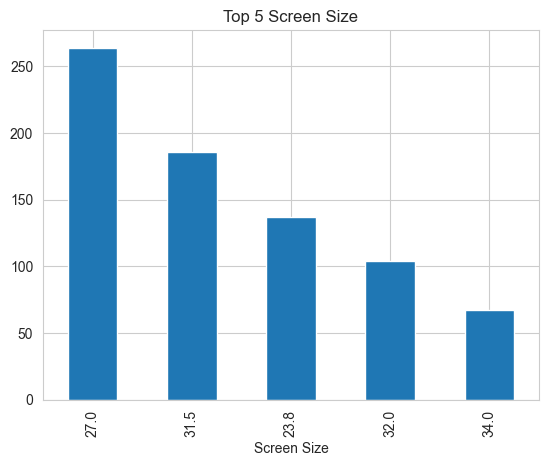

In [35]:
top_5_screen_size = df['Screen Size'].value_counts().head(5)
top_5_screen_size.plot(kind='bar')
plt.title('Top 5 Screen Size')

Text(0.5, 1.0, 'Top 5 Monitor Brand')

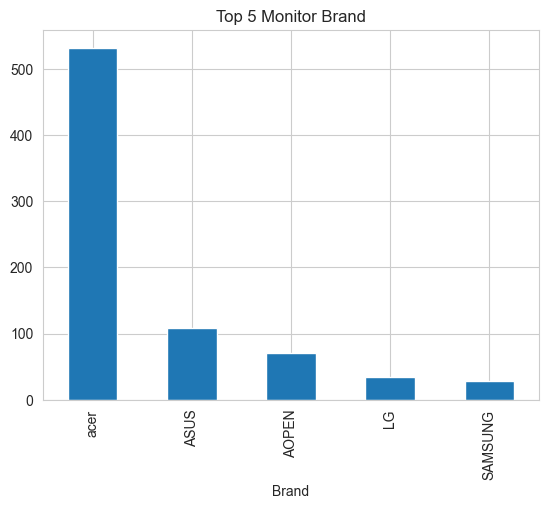

In [36]:
top_5_brand = df['Brand'].value_counts().head(5)
top_5_brand.plot(kind='bar')
plt.title("Top 5 Monitor Brand")

Text(0.5, 1.0, 'Top 5 Resolution')

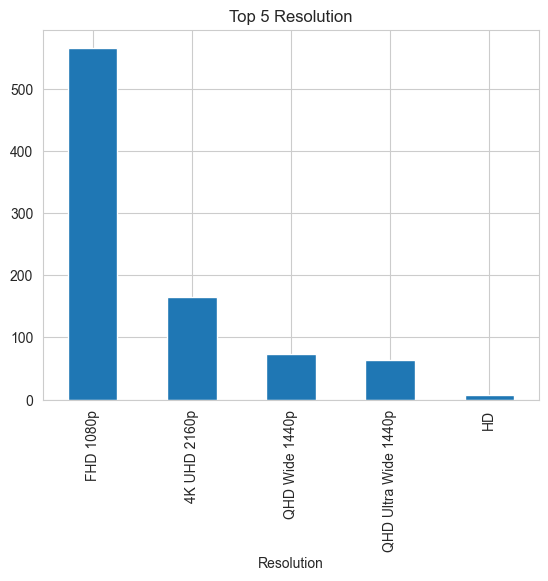

In [37]:
top_5_resolution = df['Resolution'].value_counts().head(5)
top_5_resolution.plot(kind='bar')
plt.title("Top 5 Resolution")

Text(0.5, 1.0, 'Top 5 Aspect Ratio')

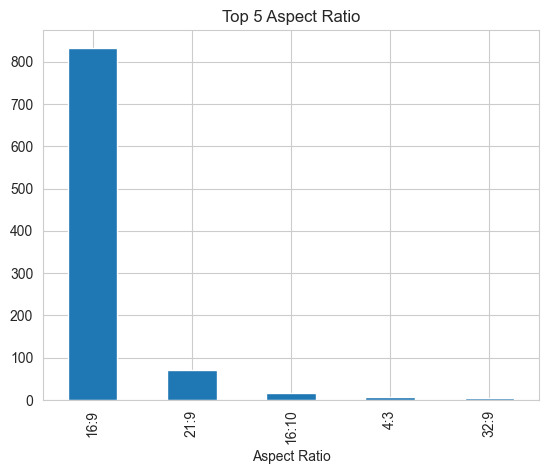

In [38]:
top_5_ration = df['Aspect Ratio'].value_counts().head(5)
top_5_ration.plot(kind='bar')
plt.title("Top 5 Aspect Ratio")

Text(0.5, 1.0, 'Price Distribution')

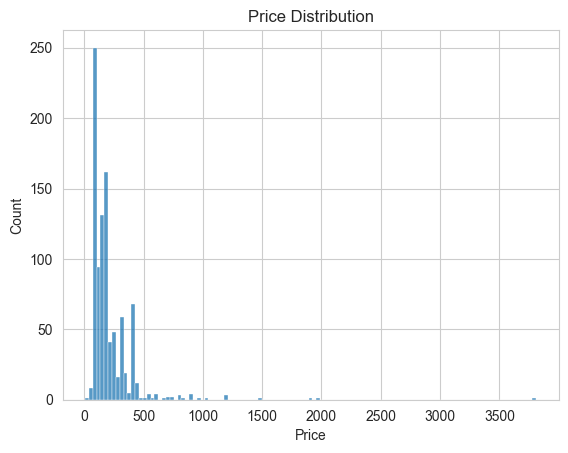

In [39]:
sns.histplot(data=df,x="Price")
plt.title("Price Distribution")

Text(0.5, 1.0, 'Screen Size vs Price')

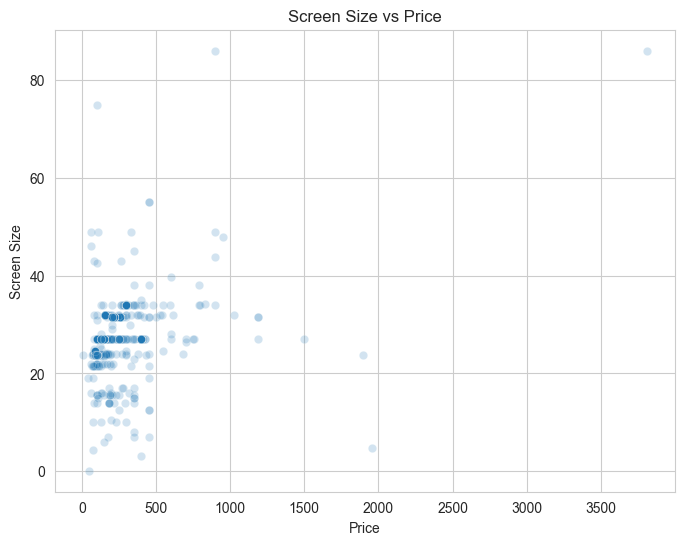

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='Screen Size', alpha=0.2)
plt.title('Screen Size vs Price')

Text(0.5, 1.0, 'Screen Size vs Rating')

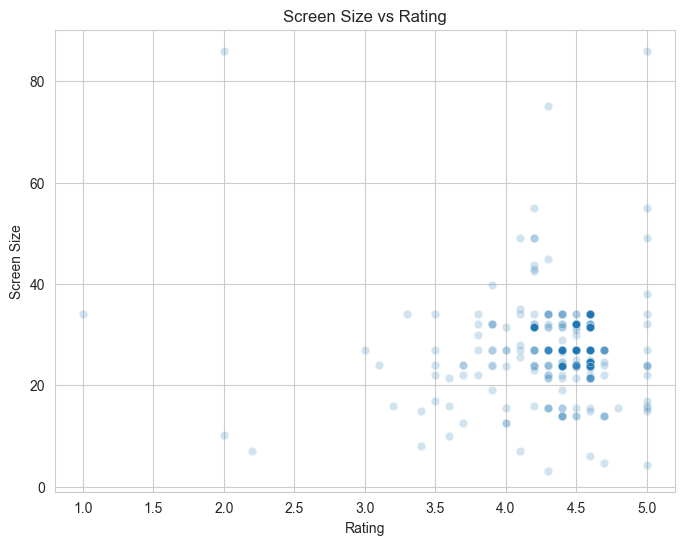

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating', y='Screen Size', alpha=0.2)
plt.title('Screen Size vs Rating')

# Modeling

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Brand'] = encoder.fit_transform(df['Brand'])
df['Aspect Ratio'] = encoder.fit_transform(df['Brand'])
df['Resolution'] = encoder.fit_transform(df['Resolution'])

In [58]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price','Title'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)

RandomForestRegressor()

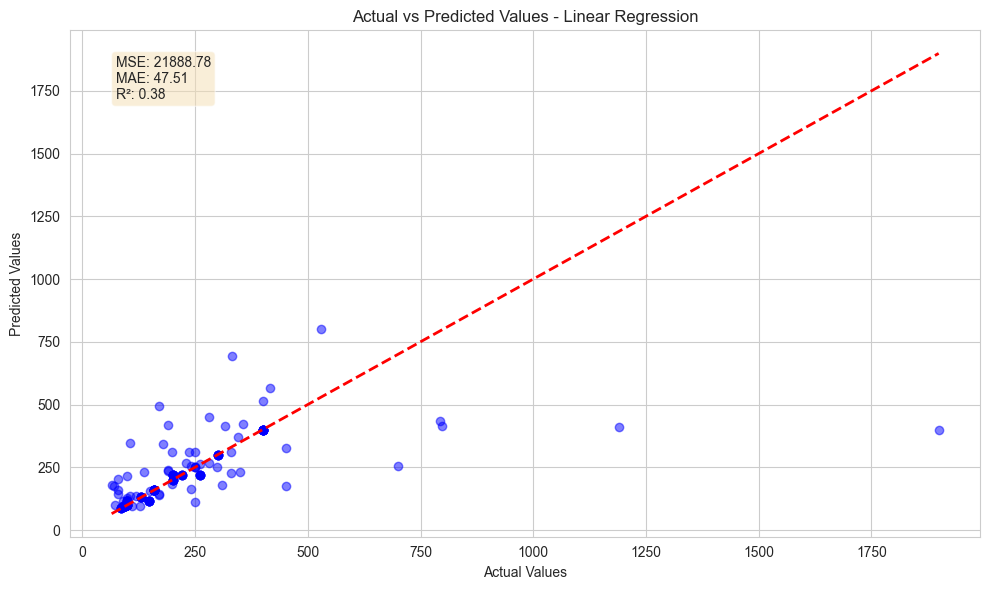

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Linear Regression')

textstr = f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()
